In [1]:
# %load ../utils/config.py
!pip install -q kaleido
!pip install scikit-lego
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

import re

from functools import partial
from scipy.stats import mode

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score, median_absolute_error, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibrationDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklego.linear_model import LADRegression

import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
import glob
import operator
import os
import shutil
import subprocess
import sys
import warnings
from array import array
from collections import defaultdict, namedtuple
from copy import copy
from functools import partial, singledispatch
from itertools import chain, combinations, product
from pathlib import Path
from time import strftime

import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as stats
import seaborn as sns
import shap
from colorama import Fore, Style
from IPython.display import HTML, Image, display_html
from lightgbm import LGBMClassifier, LGBMRegressor
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
from sklearn import clone
from sklearn.base import (
    BaseEstimator,
    ClassNamePrefixFeaturesOutMixin,
    MetaEstimatorMixin,
    OneToOneFeatureMixin,
    TransformerMixin,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import FeatureAgglomeration
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import (
    GradientBoostingRegressor,
    IsolationForest,
    RandomForestRegressor,
)
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression, SGDOneClassSVM
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.metrics import (
    confusion_matrix,
    median_absolute_error,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_predict,
    cross_val_score,
)
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.pipeline import FunctionTransformer, make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.utils.validation import check_array, check_is_fitted
from xgboost import XGBClassifier

# Environment
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None

# Colorama settings.
CLR = (Style.BRIGHT + Fore.BLACK) if ON_KAGGLE else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN
MAGENTA = Style.BRIGHT + Fore.MAGENTA
RESET = Style.RESET_ALL

# Data Frame and Plotly colors.
FONT_COLOR = "#4A4B52"
BACKGROUND_COLOR = "#FFFCFA"
GRADIENT_COLOR = "#BAB8B8"
# Define as numpy array because it supports fancy indexing.
COLOR_SCHEME = np.array(("#4A4B52", "#FCFCFC", "#E8BA91"))
# Ticks size for plotly and matplotlib.
TICKSIZE = 11

# Set Plotly theme.
pio.templates["minimalist"] = go.layout.Template(
    layout=go.Layout(
        font_family="Open Sans",
        font_color=FONT_COLOR,
        title_font_size=20,
        plot_bgcolor=BACKGROUND_COLOR,
        paper_bgcolor=BACKGROUND_COLOR,
        xaxis=dict(tickfont_size=TICKSIZE, titlefont_size=TICKSIZE, showgrid=False),
        yaxis=dict(tickfont_size=TICKSIZE, titlefont_size=TICKSIZE, showgrid=False),
        width=840,
        height=540,
        legend=dict(yanchor="bottom", xanchor="right", orientation="h", title=""),
    ),
    layout_colorway=COLOR_SCHEME,
)
pio.templates.default = "plotly+minimalist"

MATPLOTLIB_THEME = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": TICKSIZE,
    "axes.facecolor": BACKGROUND_COLOR,
    "axes.titlesize": 14,
    "axes.grid": False,
    "xtick.labelsize": TICKSIZE,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": TICKSIZE,
    "ytick.color": FONT_COLOR,
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.titlesize": 14,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "text.color": FONT_COLOR,
    "font.size": TICKSIZE,
    "font.family": "Serif",
}
sns.set_theme(rc=MATPLOTLIB_THEME)

# Define Data Frame theme.
CELL_HOVER = {  # for row hover use <tr> instead of <td>
    "selector": "td:hover",
    "props": f"background-color: {BACKGROUND_COLOR}",
}
TEXT_HIGHLIGHT = {
    "selector": "td",
    "props": f"color: {FONT_COLOR}; font-weight: bold",
}
INDEX_NAMES = {
    "selector": ".index_name",
    "props": f"font-weight: normal; background-color: {BACKGROUND_COLOR}; color: {FONT_COLOR};",
}
HEADERS = {
    "selector": "th:not(.index_name)",
    "props": f"font-weight: normal; background-color: {BACKGROUND_COLOR}; color: {FONT_COLOR};",
}
DF_STYLE = (INDEX_NAMES, HEADERS, TEXT_HIGHLIGHT)
DF_CMAP = sns.light_palette(GRADIENT_COLOR, as_cmap=True)

# Html style for table of contents, code highlight and url.
HTML_STYLE = """
    <style>
    code {
        background: rgba(42, 53, 125, 0.10) !important;
        border-radius: 4px !important;
    }
    a {
        color: rgba(123, 171, 237, 1.0) !important;
    }
    ol.numbered-list {
        counter-reset: item;
    }
    ol.numbered-list li {
        display: block;
    }
    ol.numbered-list li:before {
        content: counters(item, '.') '. ';
        counter-increment: item;
    }
    </style>
"""


# Utility functions.
def download_from_kaggle(expr, /, data_dir=None):
    """Download all files from the Kaggle competition/dataset.

    Args:
        expr: Match expression to be used by kaggle API, e.g.
            "kaggle competitions download -c competition" or
            "kaggle datasets download -d user/dataset".
        data_dir: Optional. Directory path where to save files. Default to `None`,
        which means that files will be downloaded to `data` directory.

    Notes:
        If the associated files already exists, then it does nothing.
    """

    if data_dir is None:
        data_dir = Path("data/")
    else:
        data_dir = Path(data_dir)

    match expr.split():
        case ["kaggle", _, "download", *args] if args:
            data_dir.mkdir(parents=True, exist_ok=True)
            filename = args[-1].split("/")[-1] + ".zip"
            if not (data_dir / filename).is_file():
                subprocess.run(expr)
                shutil.unpack_archive(filename, data_dir)
                shutil.move(filename, data_dir)
        case _:
            raise SyntaxError("Invalid expression!")


def get_interpolated_colors(color1, color2, /, n_colors=1):
    """Return `n_colors` colors in HEX format, interpolated beetwen `color1` and `color2`.

    Args:
        color1: Initial HEX color to be interpolated from.
        color2: Final HEX color to be interpolated from.
        n_colors: Optional. Number of colors to be interpolated between `color1`
            and `color2`. Default to 1.

    Returns:
        colors: List of colors interpolated between `color1` and `color2`.
    """

    def interpolate(color1, color2, t):
        r1, g1, b1 = int(color1[1:3], 16), int(color1[3:5], 16), int(color1[5:7], 16)
        r2, g2, b2 = int(color2[1:3], 16), int(color2[3:5], 16), int(color2[5:7], 16)
        r = int(r1 + (r2 - r1) * t)
        g = int(g1 + (g2 - g1) * t)
        b = int(b1 + (b2 - b1) * t)
        return f"#{r:02X}{g:02X}{b:02X}"

    return [interpolate(color1, color2, k / (n_colors + 1)) for k in range(1, n_colors + 1)]


def get_pretty_frame(frame, /, gradient=False, formatter=None, precision=3, repr_html=False):
    stylish_frame = frame.style.set_table_styles(DF_STYLE).format(
        formatter=formatter, precision=precision
    )
    if gradient:
        stylish_frame = stylish_frame.background_gradient(DF_CMAP)  # type: ignore
    if repr_html:
        stylish_frame = stylish_frame.set_table_attributes("style='display:inline'")._repr_html_()
    return stylish_frame


def numeric_descr(frame, /):
    return (
        frame.describe(percentiles=(0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99))
        .T.drop("count", axis=1)
        .rename(columns=str.title)
    )


def frame_summary(frame, /):
    missing_vals = frame.isna().sum()
    missing_vals_ratio = missing_vals / len(frame)
    unique_vals = frame.apply(lambda col: len(col.unique()))
    most_freq_count = frame.apply(lambda col: col.value_counts().iloc[0])
    most_freq_val = frame.mode().iloc[:1].T.squeeze()
    unique_ratio = unique_vals / len(frame)
    freq_count_ratio = most_freq_count / len(frame)

    return pd.DataFrame(
        {
            "Dtype": frame.dtypes,
            "MissingValues": missing_vals,
            "MissingValuesRatio": missing_vals_ratio,
            "UniqueValues": unique_vals,
            "UniqueValuesRatio": unique_ratio,
            "MostFreqValue": most_freq_val,
            "MostFreqValueCount": most_freq_count,
            "MostFreqValueCountRatio": freq_count_ratio,
        }
    )


def check_categories_alignment(frame1, frame2, /, out_color=BLUE):
    print(CLR + "The same categories in training and test datasets?\n")
    cat_features = frame2.select_dtypes(include="object").columns.to_list()

    for feature in cat_features:
        frame1_unique = set(frame1[feature].unique())
        frame2_unique = set(frame2[feature].unique())
        same = np.all(frame1_unique == frame2_unique)
        print(CLR + f"{feature:25s}", out_color + f"{same}")


def get_lower_triangular_frame(frame, /):
    if not frame.shape[0] == frame.shape[1]:
        raise ValueError(f"{type(frame)!r} is not square frame")
    lower_triu = np.triu(np.ones_like(frame, dtype=bool))
    frame = frame.mask(lower_triu)
    return frame.dropna(axis="index", how="all").dropna(axis="columns", how="all")


def save_and_show_fig(fig, filename, /, img_dir=None, format="png"):
    if img_dir is None:
        img_dir = Path("images")
    if not isinstance(img_dir, Path):
        raise TypeError("The `img_dir` argument must be `Path` instance!")

    img_dir.mkdir(parents=True, exist_ok=True)
    fig_path = img_dir / (filename + "." + format)
    fig.write_image(fig_path)

    return Image(fig.to_image(format=format))


def get_n_rows_and_axes(n_features, n_cols, /, start_at=1):
    n_rows = int(np.ceil(n_features / n_cols))
    current_col = range(start_at, n_cols + start_at)
    current_row = range(start_at, n_rows + start_at)
    return n_rows, tuple(product(current_row, current_col))


def get_kde_estimation(
    series,
    *,
    bw_method=None,
    weights=None,
    percentile_range=(0, 100),
    estimate_points_frac=0.1,
    space_extension_frac=0.01,
    cumulative=False,
):
    """Return pdf dictionary for set of points using gaussian kernel density estimation.

    Args:
        series: The dataset with which `stats.gaussian_kde` is initialized.
        bw_method: Optional. The method used to calculate the estimator bandwidth.
        This can be 'scott', 'silverman', a scalar constant or a callable. If a scalar,
        this will be used directly as `kde.factor`. If a callable, it should take
        a `stats.gaussian_kde` instance as only parameter and return a scalar.
        If `None` (default), 'scott' is used.
        weights: Optional. Weights of datapoints. This must be the same shape as dataset.
        If `None` (default), the samples are assumed to be equally weighted.
        percentile_range: Optional. Percentile range of the `series` to create estimated space.
        By default (0, 100) range is used.
        estimate_points_frac: Optional. Fraction of `series` length to create linspace for
        estimated points.
        space_extension_frac: Optional. Estimation space will be extended by
        `space_extension_frac * len(series)` for both edges.
        cumulative: Optional. Whether to calculate cdf. Default to `False`.

    Returns:
        Dictionary with kde space, values, and cumulative values if `cumulative` is `True`.
    """

    series = pd.Series(series).dropna()
    kde = stats.gaussian_kde(series, bw_method=bw_method, weights=weights)
    start, stop = np.percentile(series, percentile_range)

    n_points = int(estimate_points_frac * len(series))
    n_extend = int(space_extension_frac * len(series))

    if n_extend > 0:
        dx = (stop - start) / (n_points - 1)
        start, stop = start - n_extend * dx, stop + n_extend * dx

    kde_space = np.linspace(start, stop, n_points)
    kde_vals = kde.evaluate(kde_space)
    results = {"space": kde_space, "vals": kde_vals}

    if cumulative:
        kde_vals_cum = np.cumsum(kde_vals)
        return results | {"vals_cumulative": kde_vals_cum / kde_vals_cum.max()}

    return results


def unit_norm(x):
    return x / np.sum(x)


# Html highlight. Must be included at the end of all imports!
HTML(HTML_STYLE)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 4.5 MB/s eta 0:00:00a 0:00:01


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
2024-02-24 10:01:43.366390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 10:01:43.366524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 10:01:43.492712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [135]:
train = pd.read_csv('/kaggle/input/gazprom/train.csv', sep=';')  
test = pd.read_csv('/kaggle/input/gazprom/val.csv', sep=';')

In [136]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer
from scipy import stats

pd.set_option('display.max_rows',10)
pd.set_option('display.max_colwidth', None)

# Подгрузка данных
train = train.apply(pd.to_numeric, errors='coerce')
train = train.dropna()

# # Заполнение пропущенных значений медианой
# median_value = train['WCT'].median()
# train['WCT'] = train['WCT'].fillna(median_value)
# median_value = train['THP'].median()
# train['THP'] = train['THP'].fillna(median_value)
# median_value = train['GOR'].median()
# train['GOR'] = train['GOR'].fillna(median_value)
# median_value = train['PUMP'].median()
# train['PUMP'] = train['PUMP'].fillna(median_value)
# median_value = train['LIQ'].median()
# train['LIQ'] = train['LIQ'].fillna(median_value)
# median_value = train['BHP'].median()
# train['BHP'] = train['BHP'].fillna(median_value)

# Удаление некоторых строк по условию
train = train.drop(train[(train['WCT']>50) & (train['BHP'] > 0)].index)
train = train.drop(train[(train['WCT']>0) & (train['BHP'] < -10)].index)
train = train.drop(train[(train['GOR']>10) & (train['BHP'] < -10)].index)
train = train.drop(train[(train['PUMP']< 30) & (train['BHP'] < 100)].index)
train = train.drop(train[(train['PUMP']< 30) & (train['BHP'] < 100)].index)
train = train.drop(train[(train['WCT']> 1)].index)
# train = train.drop(train[(train['LIQ'] > 270)].index)
# train = train.drop(train[(train['LIQ'] < 10)].index)
# train = train.drop(train[(train['LIQ'] > 40) & (train['LIQ'] < 75)].index)

# train = train.drop(train[(train['BHP'] < 0)].index)

# train = train.drop(train[(train['PUMP'] > 57)].index)
# train = train.drop(train[(train['PUMP'] < 5)].index)

# train = train.drop(train[(train['GOR'] > 220)].index)
# train = train.drop(train[(train['PUMP'] > 60)].index)

# median_value = train['BHP'].median()
# train['BHP'] = train['BHP'].replace(0, median_value)



In [96]:
# means = np.mean(train, axis=0)
# stds = np.std(train, axis=0)

# # Вычисление Z-оценок
# z_scores = (train - means) / stds

# # Определение выбросов (наблюдения с Z-оценкой больше 3 или меньше -3)
# outlier_indices = np.where(np.abs(z_scores) > 2.5)

# # Удаление выбросов из данных
# X_cleaned = np.delete(train, outlier_indices[0], axis=0)
# column_names = train.columns.tolist()

# # Преобразование массива обратно в DataFrame
# train = pd.DataFrame(X_cleaned, columns=column_names)
# train = train.dropna()

In [137]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 17534 entries, 0 to 34299
Columns: 6 entries, THP to BHP
dtypes: float64(6)
memory usage: 958.9 KB


In [124]:
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Columns: 5 entries, THP to LIQ
dtypes: float64(2), int64(3)
memory usage: 122.2 KB


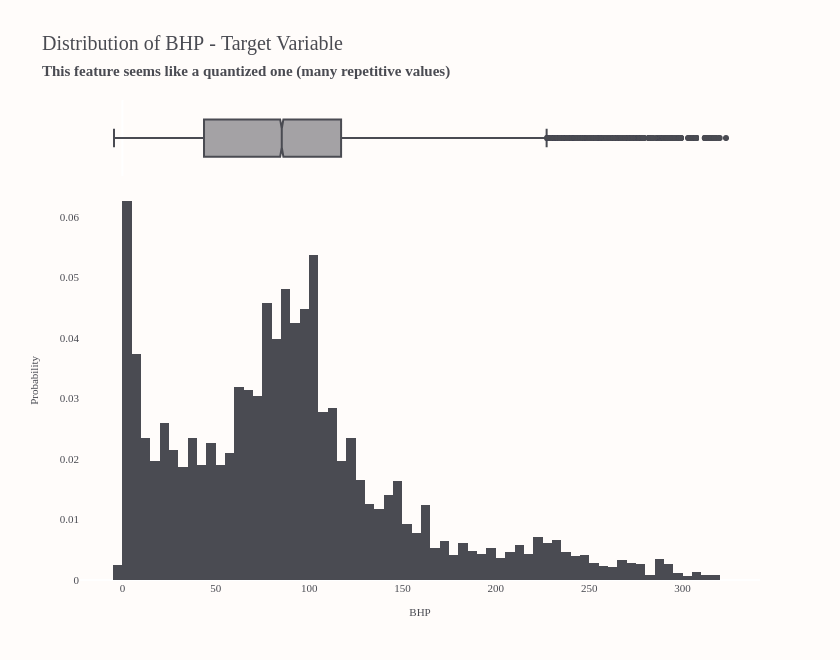

In [125]:
fig = px.histogram(
    train,
    x="BHP",
    histnorm="probability",
    marginal="box",
    height=660,
    title="Distribution of BHP - Target Variable<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "This feature seems like a quantized one (many repetitive values)</span>",
)
fig.update_yaxes(title="Probability", row=1)
save_and_show_fig(fig, "BHP")

In [34]:
print(CLR + "Training Dataset:")
train_summary = frame_summary(train)
get_pretty_frame(train_summary, gradient=True)

Training Dataset:


,Dtype,MissingValues,MissingValuesRatio,UniqueValues,UniqueValuesRatio,MostFreqValue,MostFreqValueCount,MostFreqValueCountRatio
THP,float64,0,0.000,10197,0.587,20.510,2540,0.146
WCT,float64,0,0.000,17280,0.995,0.979,88,0.005
GOR,float64,0,0.000,17287,0.995,140.486,80,0.005
PUMP,float64,0,0.000,17300,0.996,49.494,67,0.004
LIQ,float64,0,0.000,16538,0.952,350.000,817,0.047
BHP,float64,0,0.000,7064,0.407,0.000,161,0.009


In [35]:
print(CLR + "Training Dataset:")
test_num_descr = numeric_descr(train)
get_pretty_frame(test_num_descr, gradient=True)

Training Dataset:


,Mean,Std,Min,1%,5%,25%,50%,75%,95%,99%,Max
THP,16.280,30.575,1.000,1.017,1.084,1.414,1.848,20.510,97.000,97.000,97.000
WCT,0.633,0.258,0.010,0.038,0.145,0.448,0.677,0.850,0.976,0.995,1.000
GOR,141.157,73.300,30.000,30.068,30.344,66.776,140.506,213.273,250.659,250.933,251.000
PUMP,49.601,7.330,38.001,38.071,38.359,42.457,49.520,56.615,60.659,60.936,60.999
LIQ,173.007,105.439,1.001,1.195,1.955,75.378,167.062,258.987,332.547,350.000,350.000
BHP,85.358,57.003,-4.510,0.000,2.406,42.190,83.980,113.070,204.664,239.173,251.470


In [36]:
print(CLR + "Test Dataset:")
test_num_descr = numeric_descr(test)
get_pretty_frame(test_num_descr, gradient=True)

Test Dataset:


,Mean,Std,Min,1%,5%,25%,50%,75%,95%,99%,Max
THP,22.400,15.910,7.000,7.000,7.000,10.000,15.000,30.000,50.000,50.000,50.000
WCT,0.568,0.320,0.100,0.100,0.100,0.340,0.600,0.800,1.000,1.000,1.000
GOR,116.000,56.169,45.000,45.000,45.000,70.000,110.000,155.000,200.000,200.000,200.000
PUMP,47.000,5.947,39.000,39.000,39.000,42.400,46.800,51.200,55.600,55.600,55.600
LIQ,148.000,88.252,10.000,10.000,10.000,100.000,155.000,210.000,265.000,265.000,265.000


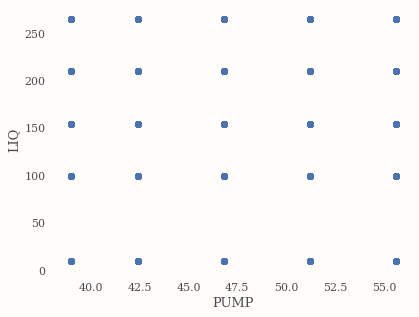

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = test['PUMP'], y = test['LIQ'])
plt.ylabel('LIQ', fontsize=13)
plt.xlabel('PUMP', fontsize=13)
plt.show()

In [138]:
train_av = train[['THP','WCT',"GOR", 'PUMP', 'LIQ','BHP']].drop("BHP", axis=1).assign(AV=0)
test_av = test[['THP','WCT',"GOR", 'PUMP','LIQ']].assign(AV=1)

data_av = pd.concat((train_av, test_av), ignore_index=True)
data_av = data_av.sample(frac=1.0, random_state=42)

X = data_av.drop("AV", axis=1)
y = data_av.AV

y_proba = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=19937),
    method="predict_proba",
)

av_scores = {
    "ConfusionMatrix": confusion_matrix(y, y_proba.argmax(axis=1)),
    "FPR-TPR-Threshold": roc_curve(y, y_proba[:, 1]),
    "ROC-AUC": roc_auc_score(y, y_proba[:, 1]),
}

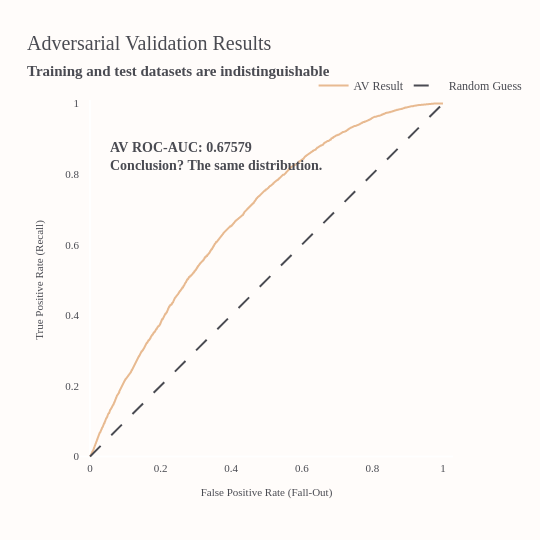

In [139]:
fig = go.Figure()
fig.add_scatter(
    x=av_scores["FPR-TPR-Threshold"][0],
    y=av_scores["FPR-TPR-Threshold"][1],
    name="AV Result",
    mode="lines",
    line_color=COLOR_SCHEME[2],
)
fig.add_scatter(
    x=[0, 1],
    y=[0, 1],
    name="Random Guess",
    mode="lines",
    line=dict(dash="longdash", color=COLOR_SCHEME[0]),
)
fig.add_annotation(
    x=0.05,
    y=0.85,
    align="left",
    xanchor="left",
    text=f"<b>AV ROC-AUC: {av_scores['ROC-AUC']:.5f}<br>" "Conclusion? The same distribution.",
    showarrow=False,
    font_size=14,
)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
    range=(-0.01, 1.01),
    title="True Positive Rate (Recall)",
)
fig.update_xaxes(
    scaleanchor="y",
    scaleratio=1,
    range=(-0.01, 1.01),
    title="False Positive Rate (Fall-Out)",
)
fig.update_layout(
    title="Adversarial Validation Results<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Training and test datasets are indistinguishable</span>",
    width=540,
    legend=dict(y=1.0, x=1.2),
)
save_and_show_fig(fig, "adversarial_validation")

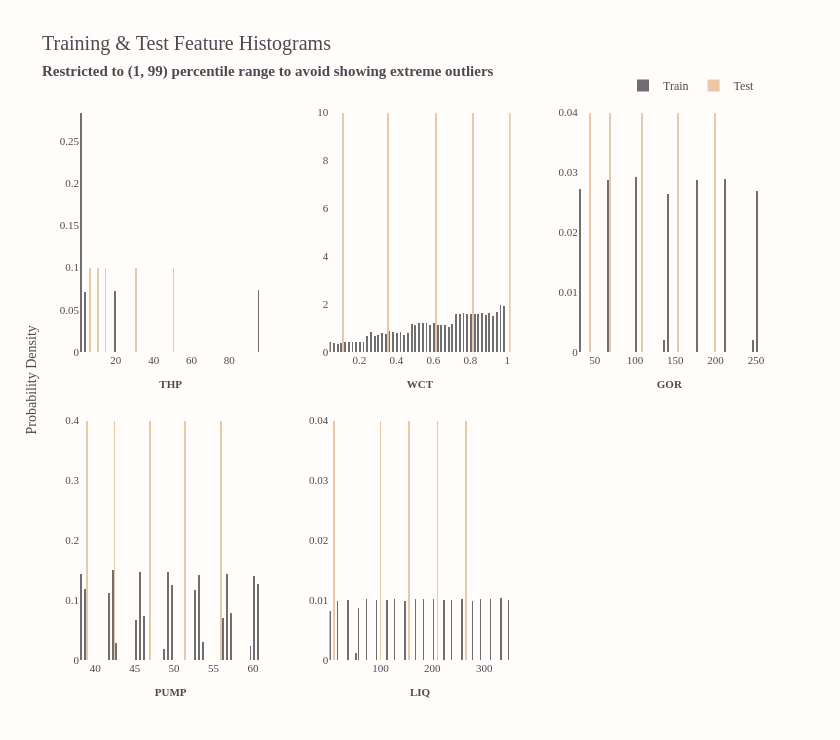

In [140]:
features = test.columns.to_list()

n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="Probability Density",
    horizontal_spacing=0.1,
    vertical_spacing=0.1,
).update_annotations(font_size=14)

for frame, color, group in zip((train, test), (COLOR_SCHEME[0], COLOR_SCHEME[2]), ("Train", "Test")):
    for k, (var, (row, col)) in enumerate(zip(features, axes), start=1):
        start, end = np.percentile(frame[var], (1, 99))
        fig.add_histogram(
            x=frame[var],
            xbins=go.histogram.XBins(start=start, end=end),
            histnorm="probability density",
            marker_color=color,
            marker_line_width=0,
            opacity=0.8,
            name=group,
            legendgroup=group,
            showlegend=k == 1,
            row=row,
            col=col,
        )
        fig.update_xaxes(title_text=f"<b>{var}</b>", row=row, col=col)

fig.update_layout(
    width=840,
    height=740,
    legend=dict(y=1, x=1),
    title="Training & Test Feature Histograms<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Restricted to (1, 99) percentile range to avoid showing extreme outliers</span>",
    bargap=0,
    bargroupgap=0,
)
save_and_show_fig(fig, "histograms")

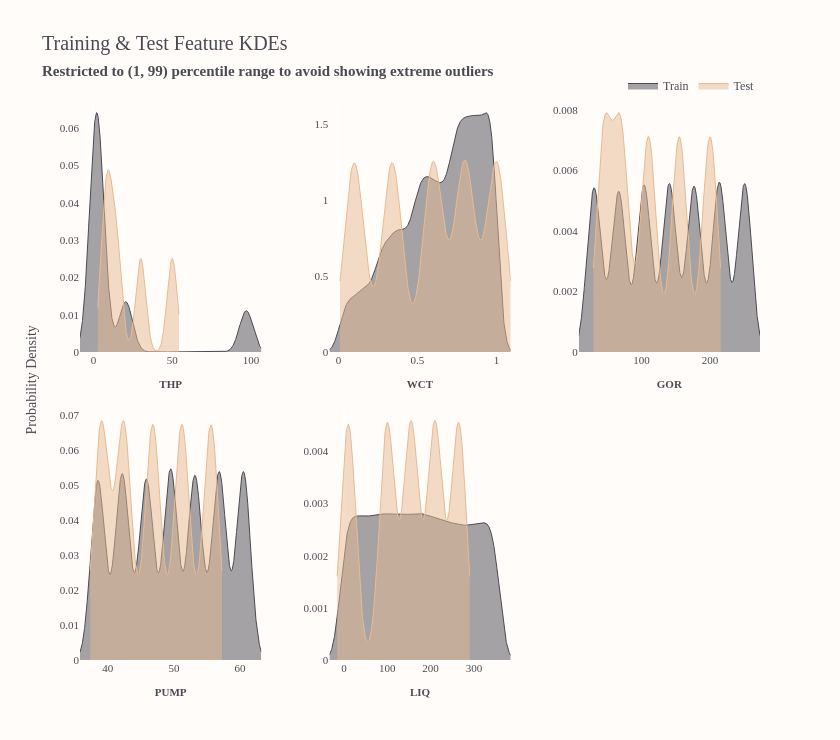

In [53]:

n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="Probability Density",
    horizontal_spacing=0.1,
    vertical_spacing=0.1,
).update_annotations(font_size=14)

for frame, color, group in zip((train, test), (COLOR_SCHEME[0], COLOR_SCHEME[2]), ("Train", "Test")):
    for k, (var, (row, col)) in enumerate(zip(features, axes), start=1):
        kde = get_kde_estimation(frame[var], percentile_range=(1, 99))
        fig.add_scatter(
            x=kde["space"],
            y=kde["vals"],
            line=dict(dash="solid", color=color, width=1),
            fill="tozeroy",
            name=group,
            legendgroup=group,
            showlegend=k == 1,
            row=row,
            col=col,
        )
        fig.update_xaxes(title_text=f"<b>{var}</b>", row=row, col=col)

fig.update_layout(
    width=840,
    height=740,
    legend=dict(y=1, x=1),
    title="Training & Test Feature KDEs<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Restricted to (1, 99) percentile range to avoid showing extreme outliers</span>",
)
save_and_show_fig(fig, "kdes")

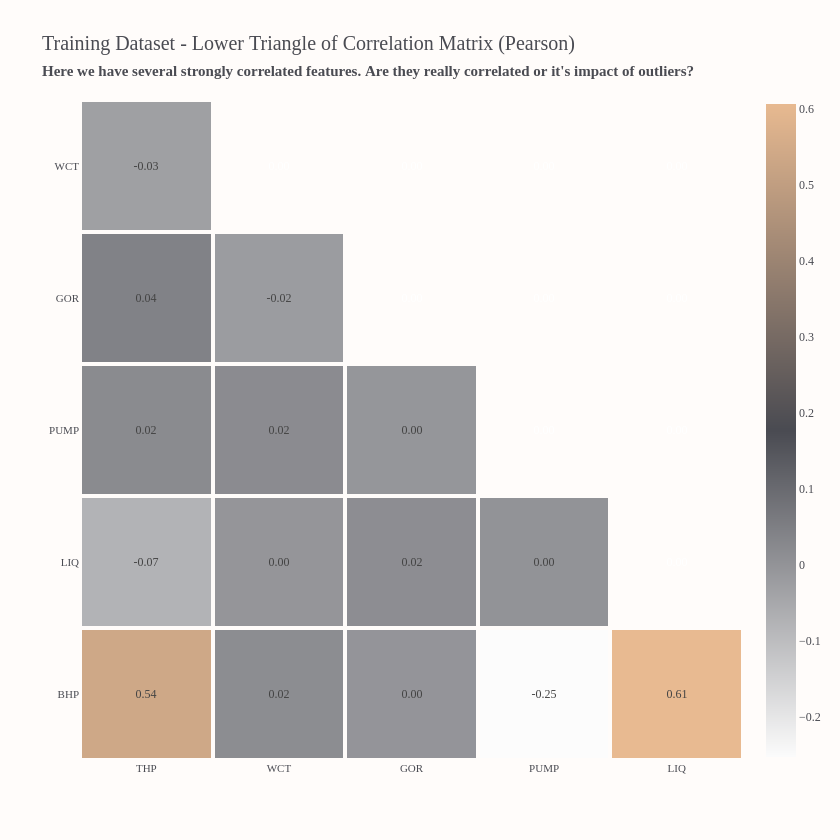

In [54]:
pearson_corr = train.corr(method="pearson")
lower_triu_corr = get_lower_triangular_frame(pearson_corr)
colormap = tuple(zip((0, 0.5, 1), COLOR_SCHEME[[1, 0, 2]]))

heatmap = go.Heatmap(
    z=lower_triu_corr,
    x=lower_triu_corr.columns,
    y=lower_triu_corr.index,
    text=lower_triu_corr.fillna(""),
    texttemplate="%{text:.2f}",
    xgap=4,
    ygap=4,
    showscale=True,
    colorscale=colormap,
    colorbar_len=1.02,
    hoverinfo="none",
)
fig = go.Figure(heatmap)
fig.update_layout(
    title="Training Dataset - Lower Triangle of Correlation Matrix (Pearson)<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Here we have several strongly correlated features. "
    "Are they really correlated or it's impact of outliers?</span>",
    yaxis_autorange="reversed",
    width=840,
    height=840,
)
save_and_show_fig(fig, "pearson_corr_matrix")

In [55]:
abs_corr = (
    lower_triu_corr.abs()
    .unstack()
    .sort_values(ascending=False)  # type: ignore
    .rename("Absolute Pearson Correlation")
    .to_frame()
    .reset_index(names=["Feature 1", "Feature 2"])
    .dropna()
    .round(5)
)

with pd.option_context("display.max_rows", 10):
    print(abs_corr)

   Feature 1 Feature 2  Absolute Pearson Correlation
0        LIQ       BHP                       0.60675
1        THP       BHP                       0.53592
2       PUMP       BHP                       0.25229
3        THP       LIQ                       0.07479
4        THP       GOR                       0.04376
..       ...       ...                           ...
10       GOR       LIQ                       0.01628
11       GOR      PUMP                       0.00391
12      PUMP       LIQ                       0.00263
13       WCT       LIQ                       0.00260
14       GOR       BHP                       0.00108

[15 rows x 3 columns]


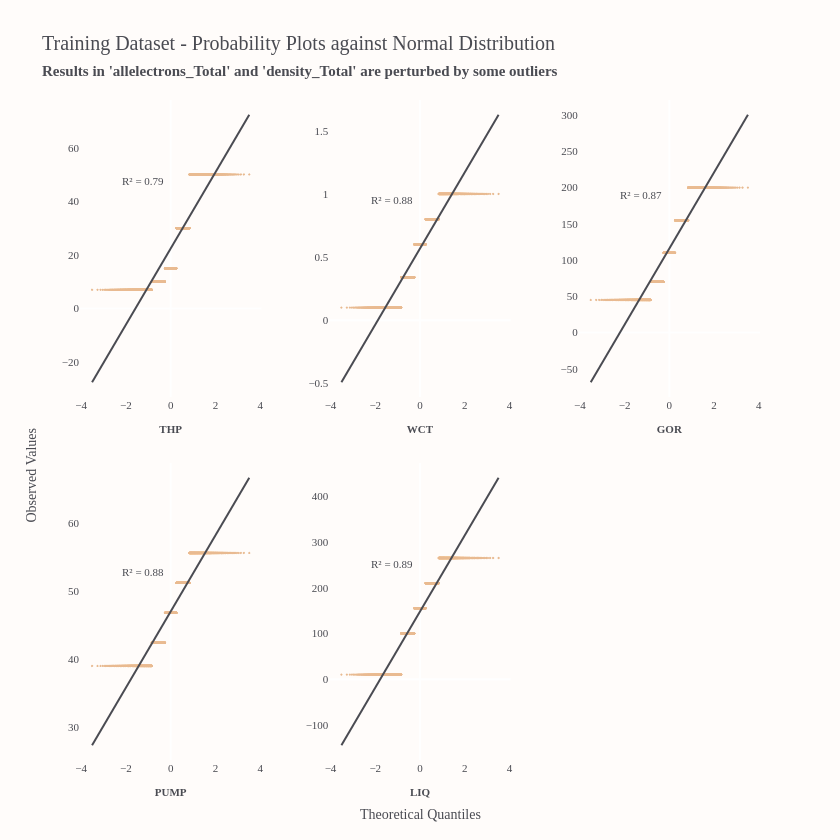

In [56]:
n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="Observed Values",
    x_title="Theoretical Quantiles",
    horizontal_spacing=0.1,
    vertical_spacing=0.1,
)
fig.update_annotations(font_size=14, yshift=-45)

for (row, col), feature in zip(axes, features):
    (osm, osr), (slope, intercept, R) = stats.probplot(test[feature].dropna(), rvalue=True)
    x_theory = np.array([osm[0], osm[-1]])
    y_theory = intercept + slope * x_theory
    R2 = f"R\u00b2 = {R * R:.2f}"
    fig.add_scatter(x=osm, y=osr, mode="markers", row=row, col=col, name=feature)
    fig.add_scatter(x=x_theory, y=y_theory, mode="lines", row=row, col=col)
    fig.add_annotation(
        x=-1.25,
        y=osr[-1] * 0.95,
        text=R2,
        showarrow=False,
        row=row,
        col=col,
        font_size=11,
    )
    fig.update_xaxes(
        title_text=f"<b>{feature}</b>",
        row=row,
        col=col,
    )

fig.update_layout(
    title="Training Dataset - Probability Plots against Normal Distribution<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Results in 'allelectrons_Total' and 'density_Total' are perturbed by some outliers</span>",
    width=840,
    height=840,
    showlegend=False,
)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=2, color=COLOR_SCHEME[2])),
    line_color=COLOR_SCHEME[0],
)
save_and_show_fig(fig, "probability_plots")

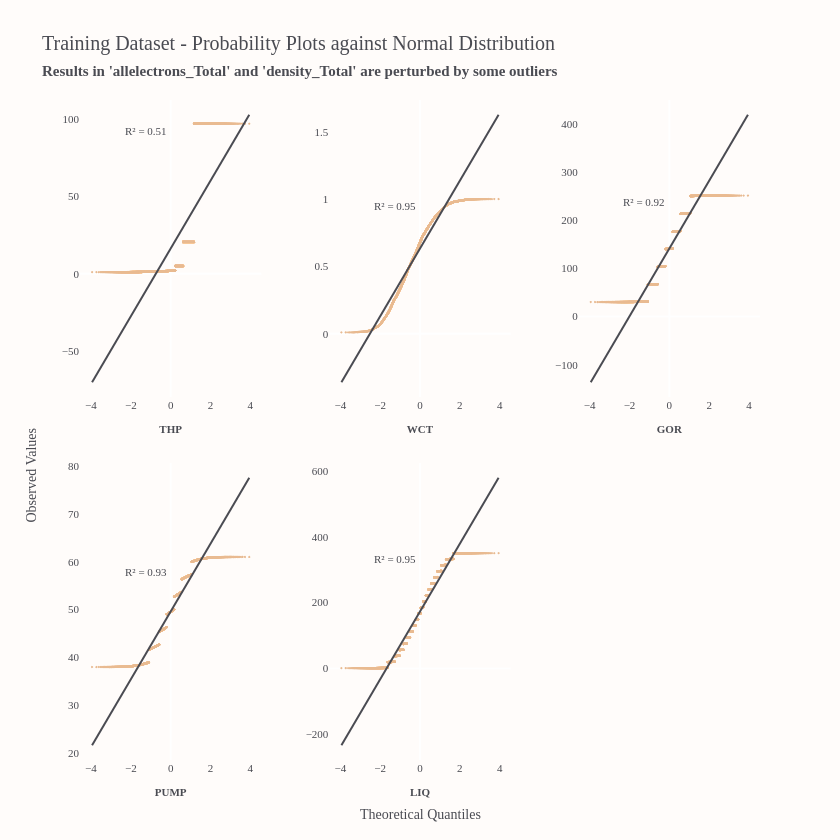

In [57]:
n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="Observed Values",
    x_title="Theoretical Quantiles",
    horizontal_spacing=0.1,
    vertical_spacing=0.1,
)
fig.update_annotations(font_size=14, yshift=-45)

for (row, col), feature in zip(axes, features):
    (osm, osr), (slope, intercept, R) = stats.probplot(train[feature].dropna(), rvalue=True)
    x_theory = np.array([osm[0], osm[-1]])
    y_theory = intercept + slope * x_theory
    R2 = f"R\u00b2 = {R * R:.2f}"
    fig.add_scatter(x=osm, y=osr, mode="markers", row=row, col=col, name=feature)
    fig.add_scatter(x=x_theory, y=y_theory, mode="lines", row=row, col=col)
    fig.add_annotation(
        x=-1.25,
        y=osr[-1] * 0.95,
        text=R2,
        showarrow=False,
        row=row,
        col=col,
        font_size=11,
    )
    fig.update_xaxes(
        title_text=f"<b>{feature}</b>",
        row=row,
        col=col,
    )

fig.update_layout(
    title="Training Dataset - Probability Plots against Normal Distribution<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Results in 'allelectrons_Total' and 'density_Total' are perturbed by some outliers</span>",
    width=840,
    height=840,
    showlegend=False,
)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=2, color=COLOR_SCHEME[2])),
    line_color=COLOR_SCHEME[0],
)
save_and_show_fig(fig, "probability_plots")

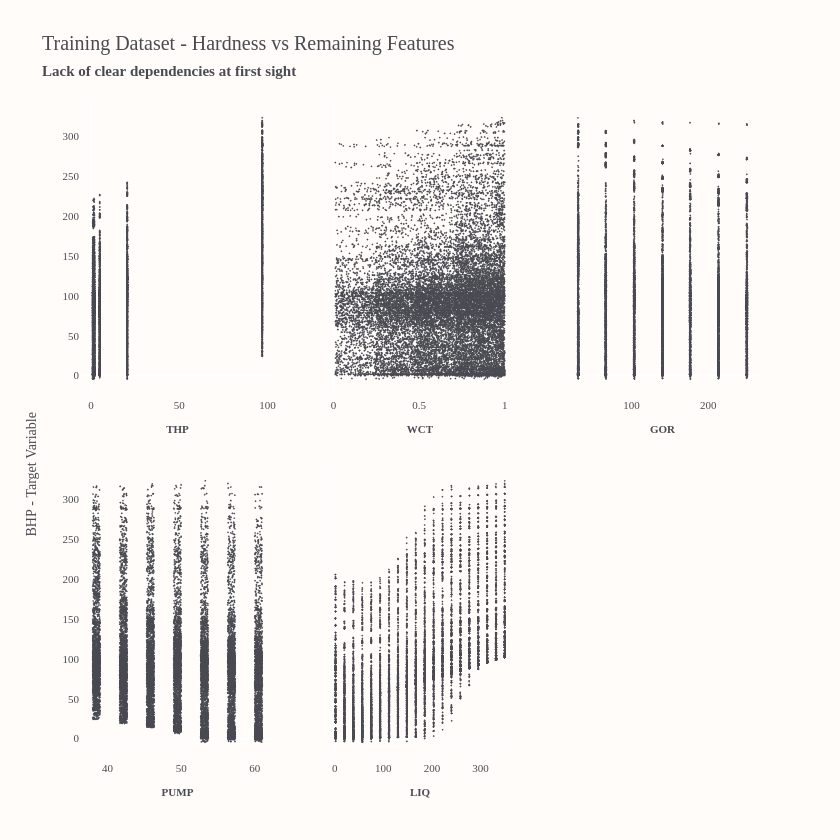

In [23]:
n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="BHP - Target Variable",
    horizontal_spacing=0.07,
    vertical_spacing=0.1,
)
fig.update_annotations(font_size=14, yshift=-45)

for (row, col), feature in zip(axes, features):
    fig.add_scatter(
        x=train[feature],
        y=train.BHP,
        mode="markers",
        name=feature,
        row=row,
        col=col,
    )
    fig.update_xaxes(
        title_text=f"<b>{feature}</b>",
        row=row,
        col=col,
    )
    if not col == 1:
        fig.update_yaxes(showticklabels=False, row=row, col=col)

fig.update_layout(
    title="Training Dataset - Hardness vs Remaining Features<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Lack of clear dependencies at first sight</span>",
    width=840,
    height=840,
    showlegend=False,
)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=1.5, color=COLOR_SCHEME[0])),
)
save_and_show_fig(fig, "scatter_plots")

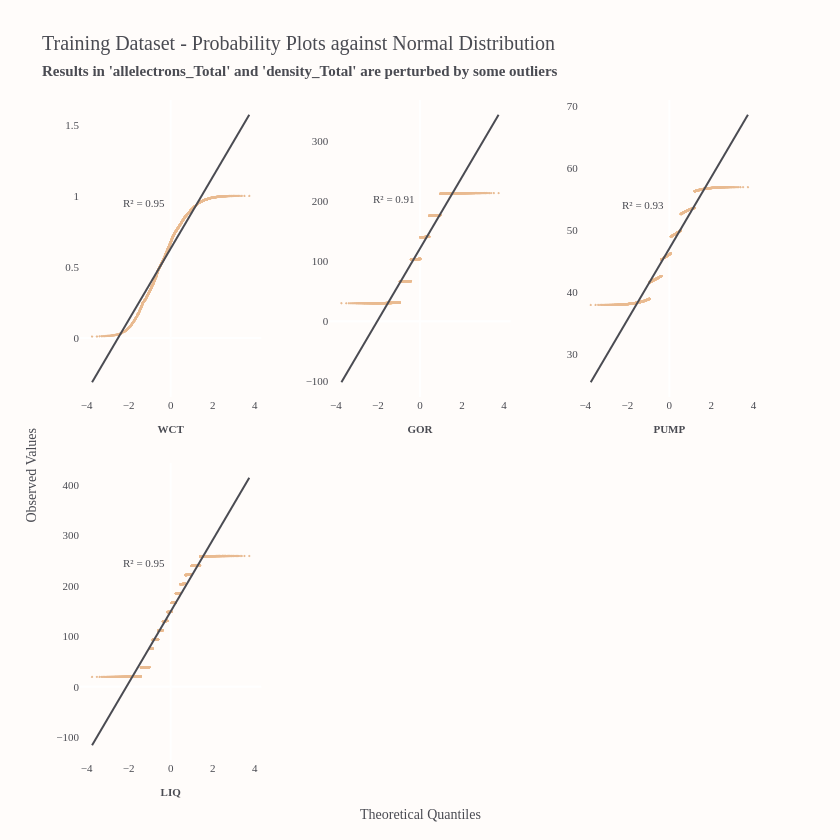

In [394]:
n_cols = 3
n_rows, axes = get_n_rows_and_axes(len(features), n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    y_title="Observed Values",
    x_title="Theoretical Quantiles",
    horizontal_spacing=0.1,
    vertical_spacing=0.1,
)
fig.update_annotations(font_size=14, yshift=-45)

for (row, col), feature in zip(axes, features):
    (osm, osr), (slope, intercept, R) = stats.probplot(train[feature].dropna(), rvalue=True)
    x_theory = np.array([osm[0], osm[-1]])
    y_theory = intercept + slope * x_theory
    R2 = f"R\u00b2 = {R * R:.2f}"
    fig.add_scatter(x=osm, y=osr, mode="markers", row=row, col=col, name=feature)
    fig.add_scatter(x=x_theory, y=y_theory, mode="lines", row=row, col=col)
    fig.add_annotation(
        x=-1.25,
        y=osr[-1] * 0.95,
        text=R2,
        showarrow=False,
        row=row,
        col=col,
        font_size=11,
    )
    fig.update_xaxes(
        title_text=f"<b>{feature}</b>",
        row=row,
        col=col,
    )

fig.update_layout(
    title="Training Dataset - Probability Plots against Normal Distribution<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Results in 'allelectrons_Total' and 'density_Total' are perturbed by some outliers</span>",
    width=840,
    height=840,
    showlegend=False,
)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=2, color=COLOR_SCHEME[2])),
    line_color=COLOR_SCHEME[0],
)
save_and_show_fig(fig, "probability_plots")

In [ ]:
r2_scores = pd.DataFrame(index=("Original", "YeoJohnson", "Log", "Sqrt"))

for feature in features:
    orig = train[feature].dropna()
    _, (*_, R_orig) = stats.probplot(orig, rvalue=True)
    _, (*_, R_yeojohn) = stats.probplot(stats.yeojohnson(orig)[0], rvalue=True)
    _, (*_, R_log) = stats.probplot(np.log1p(orig), rvalue=True)
    _, (*_, R_sqrt) = stats.probplot(np.sqrt(orig), rvalue=True)

    r2_scores[feature] = (
        R_orig * R_orig,
        R_yeojohn * R_yeojohn,
        R_log * R_log,
        R_sqrt * R_sqrt,
    )

r2_scores = r2_scores.transpose()
r2_scores["Winner"] = r2_scores.idxmax(axis=1)
get_pretty_frame(r2_scores)

In [ ]:
THP_transformed = stats.yeojohnson(train.THP.dropna())[0]
(osm, osr), (slope, intercept, R) = stats.probplot(THP_transformed, rvalue=True)
x_theory = np.array([osm[0], osm[-1]])
y_theory = intercept + slope * x_theory

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=["Probability Plot against Normal Distribution", "Distribution"],
    horizontal_spacing=0.15,
)

fig.add_scatter(x=osm, y=osr, mode="markers", row=1, col=1, name="YeoJohnson(THP)")
fig.add_scatter(x=x_theory, y=y_theory, mode="lines", row=1, col=1)
fig.add_annotation(
    x=-1.25,
    y=osr[-1] * 0.75,
    text=f"R\u00b2 = {R * R:.3f}",
    showarrow=False,
    row=1,
    col=1,
)
fig.update_yaxes(title_text="Observed Values", row=1, col=1)
fig.update_xaxes(title_text="Theoretical Quantiles", row=1, col=1)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=2, color=COLOR_SCHEME[2])),
    line_color=COLOR_SCHEME[0],
)

fig.add_histogram(
    x=THP_transformed,
    xbins=go.histogram.XBins(size=0.1),
    marker_color=COLOR_SCHEME[0],
    name="YeoJohnson(THP)",
    histnorm="probability density",
    row=1,
    col=2,
)
fig.update_yaxes(title_text="Probability Density", row=1, col=2)
fig.update_xaxes(title_text="YeoJohnson(THP)", row=1, col=2)

fig.update_layout(
    title="Yeo-Johnson Transformation for 'THP' Feature",
    showlegend=False,
    width=840,
    height=460,
    bargap=0.2,
)
fig.update_annotations(font_size=14)
save_and_show_fig(fig, "THP_after_transform")

In [ ]:
WCT_transformed = np.log(train.WCT.dropna())

# Расчет параметров для QQ-графика
(osm, osr), (slope, intercept, R) = stats.probplot(WCT_transformed, rvalue=True)
x_theory = np.array([osm[0], osm[-1]])
y_theory = intercept + slope * x_theory

# Создание графика
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=["Probability Plot against Normal Distribution", "Distribution"],
    horizontal_spacing=0.15,
)

# Добавление QQ-графика
fig.add_scatter(x=osm, y=osr, mode="markers", row=1, col=1, name="Log(WCT)")
fig.add_scatter(x=x_theory, y=y_theory, mode="lines", row=1, col=1)
fig.add_annotation(
    x=-1.25,
    y=osr[-1] * 0.75,
    text=f"R\u00b2 = {R * R:.3f}",
    showarrow=False,
    row=1,
    col=1,
)
fig.update_yaxes(title_text="Observed Values", row=1, col=1)
fig.update_xaxes(title_text="Theoretical Quantiles", row=1, col=1)
fig.update_traces(
    marker=dict(size=1, symbol="x-thin", line=dict(width=2, color=COLOR_SCHEME[2])),
    line_color=COLOR_SCHEME[0],
)

# Добавление гистограммы
fig.add_histogram(
    x=WCT_transformed,
    xbins=go.histogram.XBins(size=0.1),
    marker_color=COLOR_SCHEME[0],
    name="Log(WCT)",
    histnorm="probability density",
    row=1,
    col=2,
)
fig.update_yaxes(title_text="Probability Density", row=1, col=2)
fig.update_xaxes(title_text="Log(WCT)", row=1, col=2)

# Настройка общего макета
fig.update_layout(
    title="Logarithmic Transformation for 'WCT' Feature",
    showlegend=False,
    width=840,
    height=460,
    bargap=0.2,
)
fig.update_annotations(font_size=14)

# save_and_show_fig - это ваша функция для сохранения и отображения графика
save_and_show_fig(fig, "WCT_after_log_transform")

In [141]:
X = train.drop("BHP", axis=1)
y = train.BHP

DefaultDecisionTreeRegressor = partial(
    DecisionTreeRegressor,
    criterion="friedman_mse",  # Using Mean Squared Error (MSE) instead of absolute error.
    random_state=42,
    max_depth=3,
)

tree = DefaultDecisionTreeRegressor().fit(X, y)

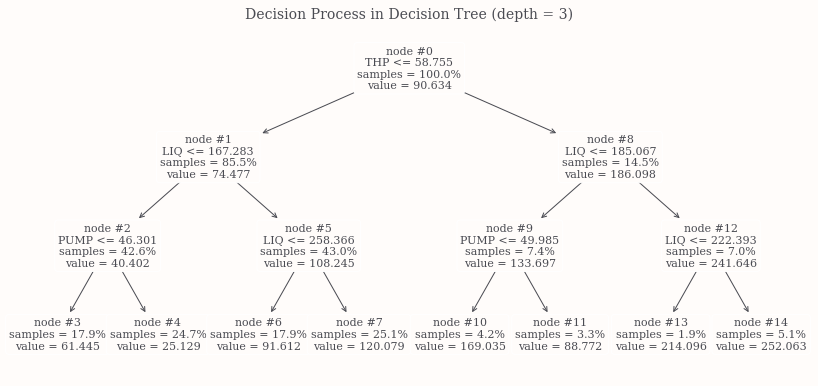

In [142]:
plt.figure(figsize=(11.5, 5.5), tight_layout=True)
plot_tree(
    decision_tree=tree,
    feature_names=tree.feature_names_in_.tolist(),
    filled=False,
    rounded=True,
    impurity=False,
    proportion=True,
    node_ids=True,
    ax=plt.gca(),
    fontsize=11,
)
plt.title("Decision Process in Decision Tree (depth = 3)")
plt.savefig("images/decision_process_in_tree")
plt.show()

In [143]:
for depth in range(2, 22):
    tree.set_params(max_depth=depth).fit(X, y)
    considered_features = tree.tree_.feature[tree.tree_.feature != -2]  # type: ignore # -2 means a leaf
    used_features = np.unique(considered_features)
    used_features = X.columns[used_features].to_list()
    print(CLR + f"Features at depth {depth}: {RED}{len(used_features):<5}", end="")
    tree_cv_results = cross_val_score(
        estimator=tree,
        X=X,
        y=y,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring="neg_mean_squared_error",
        n_jobs=2,
    )
    mean, std = -tree_cv_results.mean(), tree_cv_results.std()  # Note the negative sign to make it positive
    print(CLR + "MSE:", RED + f"{mean:.2f} \u00b1 {std:.2f}")

Features at depth 2: 2    MSE: 1211.75 ± 16.32
Features at depth 3: 3    MSE: 855.58 ± 21.71
Features at depth 4: 4    MSE: 630.96 ± 14.20
Features at depth 5: 5    MSE: 471.50 ± 12.47
Features at depth 6: 5    MSE: 376.38 ± 12.68
Features at depth 7: 5    MSE: 322.12 ± 6.16
Features at depth 8: 5    MSE: 276.14 ± 2.02
Features at depth 9: 5    MSE: 263.84 ± 4.37
Features at depth 10: 5    MSE: 264.77 ± 5.72
Features at depth 11: 5    MSE: 276.72 ± 10.80
Features at depth 12: 5    MSE: 294.64 ± 6.27
Features at depth 13: 5    MSE: 311.64 ± 9.79
Features at depth 14: 5    MSE: 326.54 ± 8.42
Features at depth 15: 5    MSE: 336.37 ± 4.59
Features at depth 16: 5    MSE: 347.92 ± 7.93
Features at depth 17: 5    MSE: 351.19 ± 2.14
Features at depth 18: 5    MSE: 359.43 ± 2.21
Features at depth 19: 5    MSE: 362.09 ± 5.03
Features at depth 20: 5    MSE: 361.16 ± 3.98
Features at depth 21: 5    MSE: 371.72 ± 6.60


In [145]:
DefaultLGBMRegressor = partial(
    LGBMRegressor,
    objective="regression_l2",
    random_state=42,
    verbose=-1,
)

In [146]:
np.random.seed(42)
seeds = np.random.randint(0, 19937, size=5)

X = train.drop("BHP", axis=1)
y = train.BHP

lgbm = DefaultLGBMRegressor()
importances = []

for seed in seeds:
    np.random.seed(seed)
    X["RANDOM_1"] = np.random.normal(size=len(X))
    X["RANDOM_2"] = np.random.normal(size=len(X))
    X["RANDOM_3"] = np.random.normal(size=len(X))
    X["RANDOM_4"] = np.random.normal(size=len(X))
    X["RANDOM_5"] = np.random.normal(size=len(X))

    lgbm.set_params(random_state=seed).fit(X, y)
    importances.append(unit_norm(lgbm.feature_importances_))

importances = (
    pd.DataFrame({"Feature": X.columns, "Importance": np.array(importances).mean(axis=0)})
    .sort_values(by="Importance", ascending=False)
    .reset_index(drop=True)
)

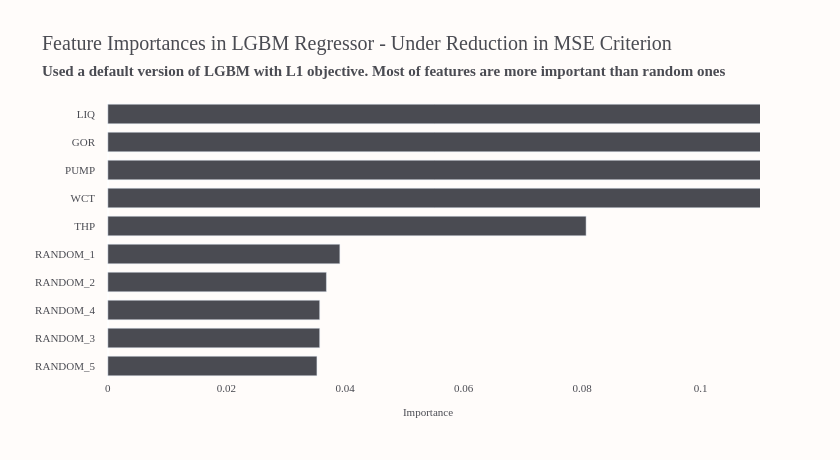

In [147]:
fig = px.bar(
    importances,
    x="Importance",
    y="Feature",
    height=460,
    width=840,
    title="Feature Importances in LGBM Regressor - Under Reduction in MSE Criterion<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    "Used a default version of LGBM with L1 objective. "
    "Most of features are more important than random ones</span>",
)
fig.update_yaxes(categoryorder="total ascending", title="")
fig.update_xaxes(range=(-0.002, 0.11))
fig.update_traces(width=0.7)
save_and_show_fig(fig, "importance_with_mse_reduction")

In [148]:
def remove_outliers(data, detector):
    if not isinstance(data, pd.DataFrame):
        raise TypeError(f"'data' must be {pd.DataFrame!r} instance")

    result = detector.fit_predict(data)
    outlier_ids = pd.Series(result == -1, index=data.index, dtype=bool)
    data_ids = pd.Series(np.ones_like(data.index), index=data.index, dtype=bool)
    
    return data[~(outlier_ids & data_ids)]

In [149]:
from sklearn.metrics import mean_squared_error
lgbm = DefaultLGBMRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
detector = make_pipeline(
    PowerTransformer(method="yeo-johnson", standardize=True),
    LocalOutlierFactor(),
)

hyperparameter = "localoutlierfactor__contamination"
hyperparameter_values = [None] + np.arange(0.01, 0.15, 0.01).tolist()
no_outliers_mse = {}

for k, (train_ids, valid_ids) in enumerate(kfold.split(X, y), start=1):
    X_train, y_train = X.iloc[train_ids], y.iloc[train_ids]
    X_valid, y_valid = X.iloc[valid_ids], y.iloc[valid_ids]

    lgbm.fit(X_train, y_train)
    default_mse = mean_squared_error(y_valid, lgbm.predict(X_valid))  # type:ignore

    for hp_value in hyperparameter_values:
        if hp_value is None:
            no_outliers_mse[f"0 - {k}"] = default_mse
            continue

        detector.set_params(**{hyperparameter: hp_value})
        X_no_outliers = remove_outliers(X_train, detector)
        y_no_outliers = y_train[X_no_outliers.index]

        lgbm.fit(X_no_outliers, y_no_outliers)
        clean_mse = mean_squared_error(y_valid, lgbm.predict(X_valid))  # type:ignore
        no_outliers_mse[f"{hp_value} - {k}"] = clean_mse
lgbm

LGBMRegressor(objective='regression_l2', random_state=42, verbose=-1)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



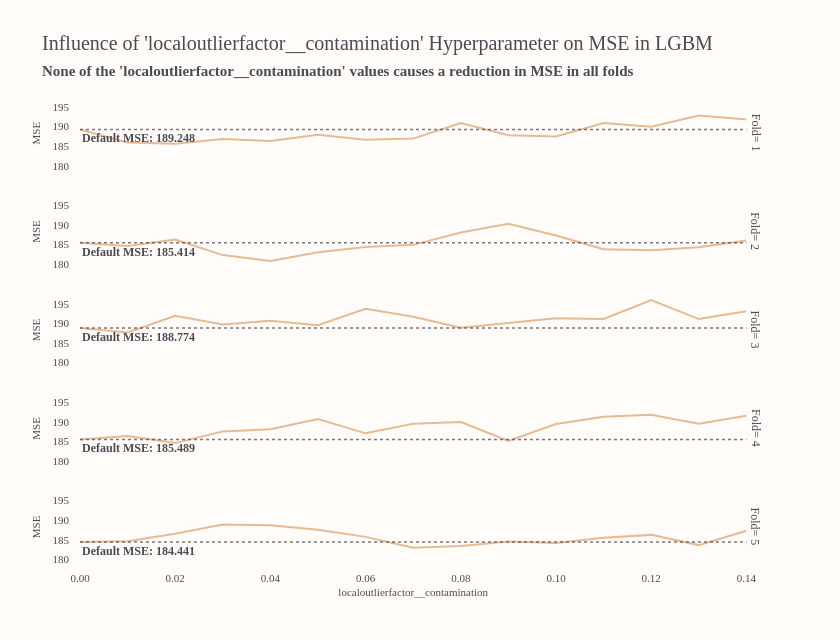

In [150]:
detector_mse = pd.DataFrame({"KEY": no_outliers_mse.keys(), "MSE": no_outliers_mse.values()})
detector_mse[[hyperparameter, "Fold"]] = detector_mse.KEY.str.split("-", expand=True)
default_mse = detector_mse[detector_mse[hyperparameter].astype(float) == 0].MSE

fig = px.line(
    detector_mse,
    x=hyperparameter,
    y="MSE",
    facet_row="Fold",
    facet_row_spacing=0.07,
    color_discrete_sequence=COLOR_SCHEME[2:],
    height=640,
    width=840,
    title=f"Influence of '{hyperparameter}' Hyperparameter on MSE in LGBM<br>"
    "<span style='font-size: 75%; font-weight: bold;'>"
    f"None of the '{hyperparameter}' values causes "
    "a reduction in MSE in all folds</span>",
)
for fold, fold_default_mse in enumerate(default_mse):
    fig.add_hline(
        fold_default_mse,
        annotation_text=f"<b>Default MSE: {fold_default_mse:.3f}</b>",
        annotation_position="bottom left",
        annotation_font_size=12,
        line_width=1.5,
        opacity=0.75,
        line_dash="dot",
        line_color=COLOR_SCHEME[0],
        row=len(default_mse) - fold,  # type:ignore
    )
fig.update_traces(line_width=2)
fig.update_layout(margin_pad=10)
fig.update_xaxes(tickformat=".2f", type="linear")
save_and_show_fig(fig, "outlier_detection")

In [151]:
from sklearn.model_selection import train_test_split
X = train[["THP",'WCT', 'GOR', 'PUMP', 'LIQ']]
y = train[['BHP']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [152]:
skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
stand_tran = make_pipeline(PowerTransformer())
# stand_tran = make_pipeline(RobustScaler())

proccessor = make_column_transformer(
    (stand_tran, ("THP",'WCT',"GOR", "PUMP", 'LIQ')), 
    remainder = 'passthrough')

knn = make_pipeline(proccessor, KNeighborsRegressor())
knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  ('THP', 'WCT', 'GOR', 'PUMP',
                                                   'LIQ'))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [153]:
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 70, 100, 150, 200]:
    
    knn_cv_routine = cross_val_score(make_pipeline(proccessor, KNeighborsRegressor(n_neighbors=i)), X_train, y_train,
                                     scoring='neg_mean_squared_error',
                                     cv=skf,
                                     n_jobs=-1)

    print(f"The average oof Mean Squared Error score of the k-NN model with {i} neighbors is {-1*knn_cv_routine.mean()}")

The average oof Mean Squared Error score of the k-NN model with 5 neighbors is 459.97176572349815
The average oof Mean Squared Error score of the k-NN model with 10 neighbors is 449.1781934071482
The average oof Mean Squared Error score of the k-NN model with 15 neighbors is 490.1924826072159
The average oof Mean Squared Error score of the k-NN model with 20 neighbors is 531.0768665736881
The average oof Mean Squared Error score of the k-NN model with 25 neighbors is 560.4173185512761
The average oof Mean Squared Error score of the k-NN model with 30 neighbors is 583.9275092722348
The average oof Mean Squared Error score of the k-NN model with 35 neighbors is 603.5841090088741
The average oof Mean Squared Error score of the k-NN model with 40 neighbors is 622.5412529932701
The average oof Mean Squared Error score of the k-NN model with 45 neighbors is 639.1892435787786
The average oof Mean Squared Error score of the k-NN model with 50 neighbors is 653.4920079709324
The average oof Mean

In [154]:
Cat_cv_routine = cross_val_score(CatBoostRegressor(objective = 'RMSE',
                                                   iterations = 1000,
                                                   learning_rate = 0.01,                                          
                                                   verbose = False), 
                                 X_train,
                                 y_train,
                                 scoring = 'neg_mean_squared_error',
                                 cv = skf, 
                                 n_jobs = -1)

print(f"The average oof Mean Squared Error score of the CatBoost model is {-1*Cat_cv_routine.mean()}")

The average oof Mean Squared Error score of the CatBoost model is 196.8761292170814


In [155]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

md1 = make_pipeline(PowerTransformer(), GradientBoostingRegressor(**{'loss': 'squared_error',
 'max_depth': 5,  # уменьшим максимальную глубину
 'learning_rate': 0.03,
 'n_estimators': 1000,
 'min_samples_leaf': 20,  # уменьшим минимальное количество образцов в листе
 'min_samples_split': 30,  # уменьшим минимальное количество образцов для разделения узла
 'random_state': 1}))

md2 = make_pipeline(MinMaxScaler(), HistGradientBoostingRegressor(**{'loss': 'squared_error',
 'l2_regularization': 0.035,
 'early_stopping': True,  # включим раннюю остановку
 'learning_rate': 0.014,
 'max_iter': 750,  # уменьшим количество итераций
 'max_depth': 9,  # уменьшим максимальную глубину
 'max_bins': 128,  # уменьшим количество корзин
 'min_samples_leaf': 60,  # уменьшим минимальное количество образцов в листе
 'max_leaf_nodes': 30}))  # уменьшим максимальное количество листовых узлов

md3 = LGBMRegressor(**{
    'objective': 'regression',
    'n_estimators': 300,      # Уменьшим количество деревьев
    'learning_rate': 0.1,    # Увеличим коэффициент обучения
    'max_depth': 6,           # Уменьшим максимальную глубину деревьев
    'reg_alpha': 0.1,         # Уменьшим параметр регуляризации L1
    'reg_lambda': 0.1,        # Уменьшим параметр регуляризации L2
    'num_leaves': 30,         # Уменьшим количество листьев
    'subsample': 0.8,         # Доля выборки для обучения каждого дерева
    'colsample_bytree': 0.8   # Доля признаков для обучения каждого дерева
})
md4 = make_pipeline(MinMaxScaler(), XGBRegressor(**{'objective': 'reg:squarederror',
 'tree_method': 'hist',
 'max_depth': 6,  # уменьшим максимальную глубину
 'learning_rate': 0.02,
 'n_estimators': 1000,  # уменьшим количество деревьев
 'gamma': 0.5,  # уменьшим параметр регуляризации
 'min_child_weight': 10,  # уменьшим минимальный вес дочернего узла
 'colsample_bytree': 0.8,
 'subsample': 0.8}))

md5 = CatBoostRegressor(**{'loss_function': 'RMSE',
 'iterations': 1000,  # уменьшим количество итераций
 'learning_rate': 0.03,
 'depth': 6,  # уменьшим глубину
 'random_strength': 0.1,  # уменьшим параметр регуляризации
 'bagging_temperature': 0.5,
 'border_count': 128,  # уменьшим количество границ
 'l2_leaf_reg': 5,  # уменьшим параметр регуляризации
 'verbose': False,
 'task_type': 'CPU'})

md6 = make_pipeline(PowerTransformer(), SVR(kernel='rbf',
                                            C=1,  # уменьшим параметр регуляризации
                                            gamma='auto'))  # используем автоматическое значение gamma

voting_regressor = VotingRegressor(estimators=[('GB', md1),
                                               ('HGB', md2),
                                               ('LGBM', md3),
                                               ('XGB', md4),
                                               ('Cat', md5)],
                                   n_jobs=-1,
                                   weights=[0.20, 0.20, 0.1, 0.2 ,0.30])
voting_regressor

VotingRegressor(estimators=[('GB',
                             Pipeline(steps=[('powertransformer',
                                              PowerTransformer()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(learning_rate=0.03,
                                                                        max_depth=5,
                                                                        min_samples_leaf=20,
                                                                        min_samples_split=30,
                                                                        n_estimators=1000,
                                                                        random_state=1))])),
                            ('HGB',
                             Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('histgradientboostingregressor',
                                              HistGra...
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=6,
                                                           max_leaves=None,
                                                           min_child_weight=10,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=1000,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))])),
                            ('Cat',
                             <catboost.core.CatBoostRegressor object at 0x7e96defa7850>)],
                n_jobs=-1, weights=[0.2, 0.2, 0.1, 0.2, 0.3])

In [156]:
X = train.drop(columns = ['BHP'], axis = 1)
Y = train['BHP']
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
vot_scores, vot_preds = list(), list()
stack_scores, stack_preds = list(), list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
    print('----------------------------------------------------------')
    
    ############
    ## Voting ##
    ############
    
    vot = voting_regressor.fit(X_train, Y_train)
    vot_pred = vot.predict(X_test)
    
    vot_score = mean_squared_error(Y_test, vot_pred)
    vot_scores.append(vot_score)
    
    print('Fold', i, '==> Voting Regressor oof mean_squared_error score is ==>', vot_score)
    
    vot_pred_test = vot.predict(X_test)
    vot_preds.append(vot_pred_test)


----------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 0 ==> Voting Regressor oof mean_squared_error score is ==> 191.66757057745582
----------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 1 ==> Voting Regressor oof mean_squared_error score is ==> 158.63911155067623
----------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 2 ==> Voting Regressor oof mean_squared_error score is ==> 175.3845587641249
----------------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 15780, number of used features: 5
[LightGBM] [Info] Start training from score 90.501173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Fold 4 ==> Voting Regressor oof mean_squared_error score is ==> 168.13557062672524
----------------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 15780, number of used features: 5
[LightGBM] [Info] Start training from score 90.833818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [157]:
df_val = pd.read_csv('/kaggle/input/gazprom/val.csv', sep=';')
X_val = df_val[['THP', 'WCT', 'GOR', 'PUMP', 'LIQ']]

# Прогнозирование на тестовых данных
y_pred_val = voting_regressor.predict(X_val)

# Сохранения файла с ответами
pd.DataFrame(y_pred_val, columns=["BHP"]).to_csv('predictions.csv', sep=';', index=False, encoding="utf-8")